In [1]:
from thinkdsp import *
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm
from PIL import Image

First, let's listen what kind of audios we have. The words are easily distinguishable, no noise. Some of them sound as if they were taken from a gachi video.

Audio's spectrograms are clean.

In [2]:
plt.hist(spectrogram.get_data().flatten())
plt.show()

NameError: name 'spectrogram' is not defined

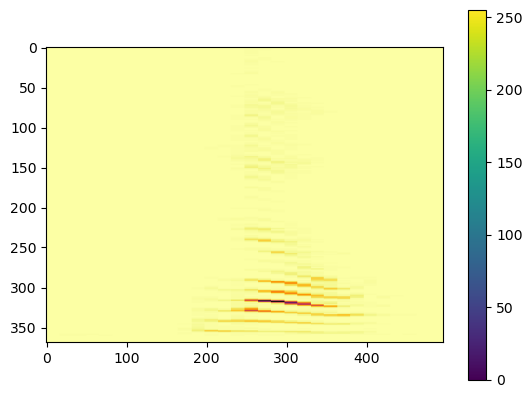

In [14]:
imshow = plt.imshow(im[:, :, :3])
cbar = plt.colorbar(imshow, cmap='inferno_r')
plt.show()

In [5]:
import imageio.v3 as iio

im = iio.imread('text.png')
print(im.shape)

(369, 496, 4)


In [4]:
axs.set_axis_off()
fig.savefig('text.png', bbox_inches='tight', pad_inches=0)

no


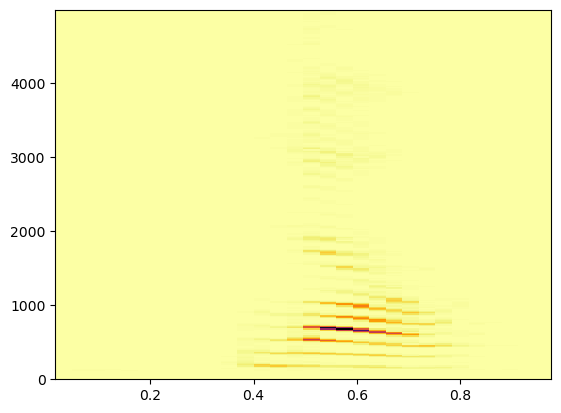

In [3]:
l = []
for cls in os.listdir('train_audio'):
    print(cls)
    path = os.path.join('train_audio', cls)
    path = os.path.join(path, os.listdir(path)[0])
    wave = read_wave(path)
    display(wave.make_audio())
    
    spectrogram = wave.make_spectrogram(seg_length=1024)
    fig, axs, img, array, ts, fs = spectrogram.plot(high=5000)
#     plt.show()
#     fig.show()
    break

In [65]:
np.diff(np.asarray(ts))

array([0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032,
       0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032,
       0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032,
       0.032, 0.032])

In [4]:
len(ts), fs.shape

(30, (320,))

In [5]:
array.shape

(320, 30)

In [6]:
img.get_array().reshape(img._meshWidth, img._meshHeight)

AttributeError: 'QuadMesh' object has no attribute '_meshWidth'

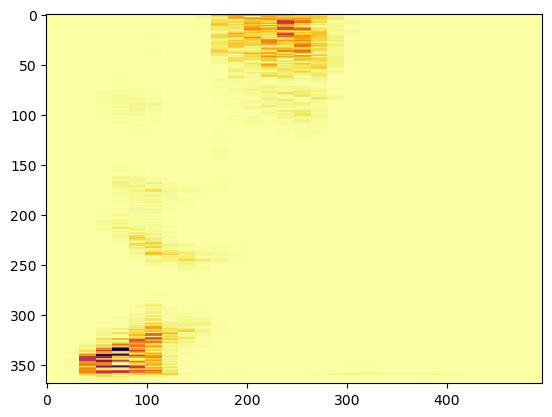

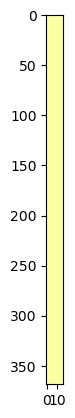

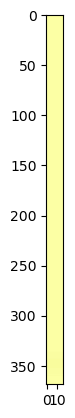

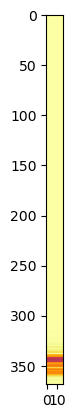

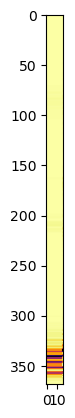

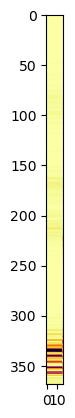

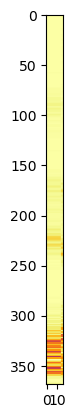

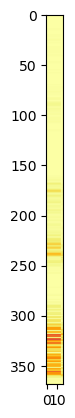

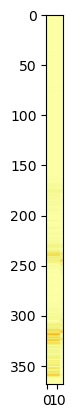

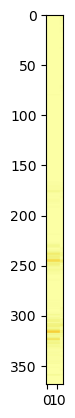

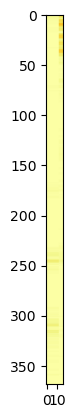

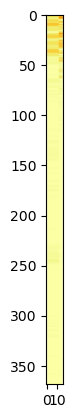

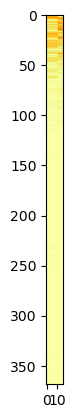

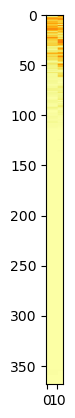

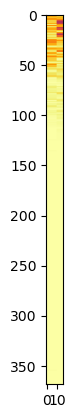

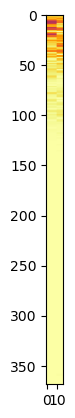

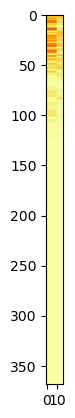

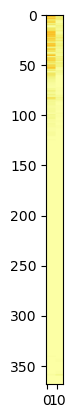

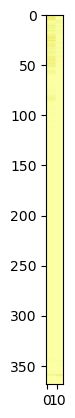

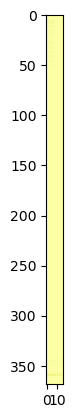

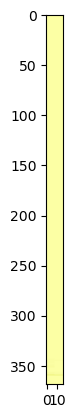

In [17]:

with Image.open('test_spec/yes/0.png') as img:
    img = np.asarray(img)
    
plt.imshow(img)
plt.show()
for i in range(0, 369-30, 17):
    plt.imshow(img[:, i:i+17])#, bbox_inches='tight', pad_inches=0)
    plt.show()

In [9]:
img.shape[1] / 30

16.533333333333335

Now I want to see what are the lengths (in timesteps) of each wav file. I want to generate adversarial examples directly on a spectrogram. But since I can change only 15% of all timesteps, I need to see what is the maximum amount of time-slices on the spectrogram I can take.

In [31]:
def wav_length(wav):
    wav = str(wav)
    wave = read_wave(wav)
    return wave.ys.shape[0]

In each audiofile 15% is 

In [282]:
wavs = Path('train_audio').rglob("*.wav")
ls = list(map(wav_length, wavs))
print("Train 15% lengths:", min(ls) * .15, max(ls) * .15)

wavs = Path('test_audio').rglob("*.wav")
ls = list(map(wav_length, wavs))
print("Test 15% lengths:", min(ls) * .15, max(ls) * .15)

Train 15% lengths: 1024.05 2400.0
Test 15% lengths: 1126.5 2400.0


100%|██████████████████████████████████████████████████████████████| 6398/6398 [00:21<00:00, 290.95it/s]


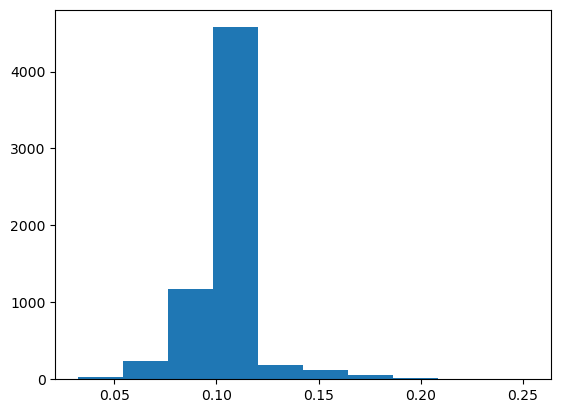

In [398]:
def frac_changed(path):
    
    wave = read_wave(str(path))

    spectrogram = wave.make_spectrogram(seg_length=1024)
    spectrogram.spec_map[k].hs = np.random.randn(*spectrogram.spec_map[k].hs.shape)
    new_wave = spectrogram.make_wave()

    pad_shape = (0, wave.ys.shape[0] - new_wave.ys.shape[0])
    return 1 - np.isclose(wave.ys, np.pad(new_wave.ys, pad_shape)).sum() / wave.ys.shape[0]

wavs = list(Path('train_audio').rglob("*.wav"))
fracs = list(map(frac_changed, tqdm(wavs)))
plt.hist(fracs)
plt.show()

In [4]:
model = keras.models.load_model('my_model')

In [436]:
tf.math.argmax(probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [464]:
arr.shape

(369, 496)

In [488]:
arr[:, 1:].shape

(496,)

In [497]:
np.int32(((arr[:, 1:] - arr[:, :-1]) != 0)[0]).sum()#.shape

10

In [24]:
np.sum((arr[:, 1:] - arr[:, :-1]) != 0, axis=1)

array([10, 10,  9, 10,  9, 11,  9, 11, 11, 11,  9, 10, 10, 11, 13, 13, 11,
       11,  9, 10, 12, 12, 12, 10, 11, 12, 12, 10, 12, 10, 10,  9, 12, 13,
       12, 11, 12, 12, 12,  9, 12, 12, 10,  9,  9,  9,  9, 12, 12, 11, 10,
        9,  9,  9,  9, 11,  8,  8, 10, 11, 11, 10,  7,  7,  9, 10,  8,  8,
        6,  6, 12, 10, 13, 13, 12, 12, 15, 13, 14, 13, 14, 13, 13, 12, 11,
       13, 13, 12, 10, 11, 11, 12, 12, 12, 13, 12, 12, 12, 12, 12, 11,  9,
       13, 12, 12,  9, 11, 10,  9,  5,  8,  9,  9,  7,  8,  8,  8,  8,  6,
        6,  5,  7,  6,  5,  2,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        8,  4,  2,  2,  2,  2,  2,  3,  2,  2,  2,  0,  0,  0,  0,  2,  2,
        4,  4,  3,  3,  3,  5,  4,  2,  2,  4,  6,  6,  7,  7,  6,  5,  6,
        5,  8,  8,  6,  7,  7,  8,  6,  4,  4,  7,  6,  8,  5,  5,  4,  4,
        5,  5,  5,  5,  4,  5,  4,  4,  5,  5,  5,  5,  5,  4,  4,  6,  3,
        3,  5,  6,  4,  5,  5,  5,  5,  5,  6,  7,  5,  5,  6,  5,  6,  4,
        5,  5,  5,  5,  5

In [484]:
arr.shape

(369, 496)

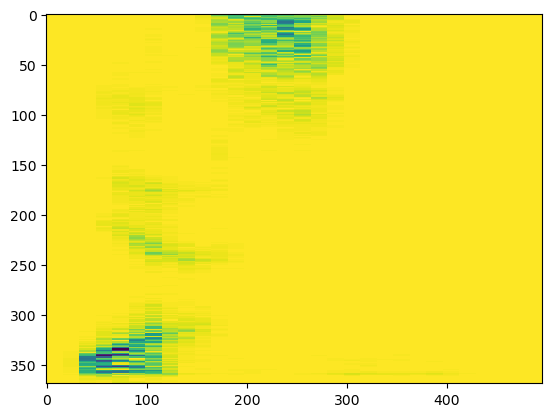

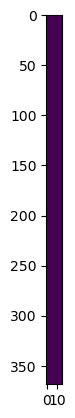

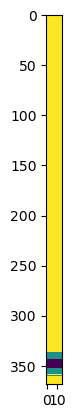

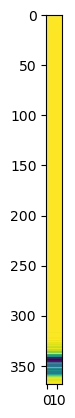

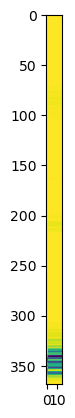

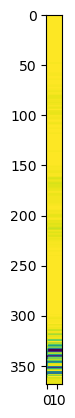

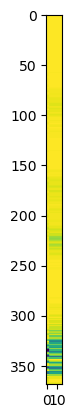

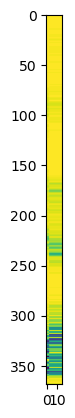

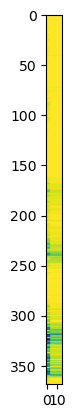

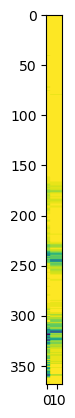

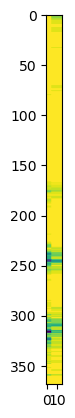

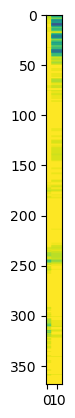

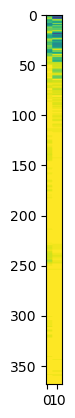

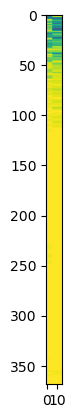

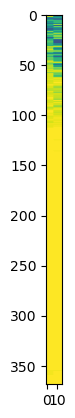

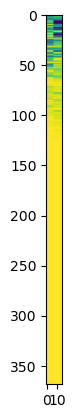

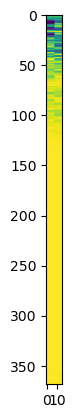

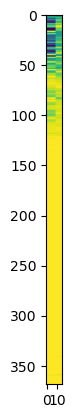

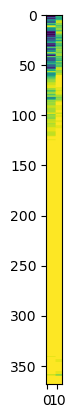

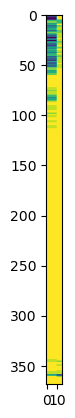

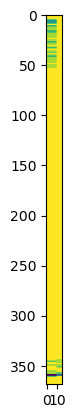

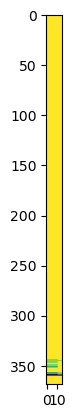

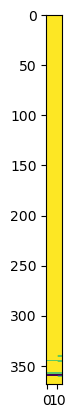

In [23]:
arr = np.uint8(img.numpy()[0]*255)
arr = np.asarray(Image.fromarray(arr).convert("L"))

plt.imshow(arr)
plt.show()
for i in range(0, 369-30, 16):
    plt.imshow(arr[:, i:i+16])
    plt.show()

In [31]:
classes = os.listdir('train_spec')
wave = read_wave('test_audio/yes/cc6ee39b_nohash_3.wav')
with Image.open('test_spec/yes/0.png') as img:
    img = tf.convert_to_tensor(img)[None, :,:,:3] / 255
    
    with tf.GradientTape() as tape:
        tape.watch(img)
        probs = model(img)
        cls = tf.math.argmax(probs[0])
        loss = probs[0, cls]
        
    grad = tape.gradient(loss, img)
    grad

In [32]:
grad

<tf.Tensor: shape=(1, 369, 496, 3), dtype=float32, numpy=
array([[[[-1.2434280e-07, -1.7608794e-08,  2.5572504e-09],
         [-2.8555647e-08,  8.7488345e-08, -2.3575092e-07],
         [-7.8323367e-08, -9.4001962e-08, -1.4352177e-07],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

        [[-7.3920603e-08,  4.5810452e-08,  1.0714765e-07],
         [-3.5432244e-08, -1.2777042e-07,  1.5926396e-07],
         [-9.3859320e-08,  4.5554748e-07, -4.8679034e-08],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

        [[ 9.3688186e-09,  2.5804508e-07,  7.5711881e-09],
         [ 1.2088626e-07,  5.7391333e-08,  1.4252400e-07],
         [-1.1067401e-07,  2.8946226e-07, -7.7533784e-08],
         ...,
         [ 

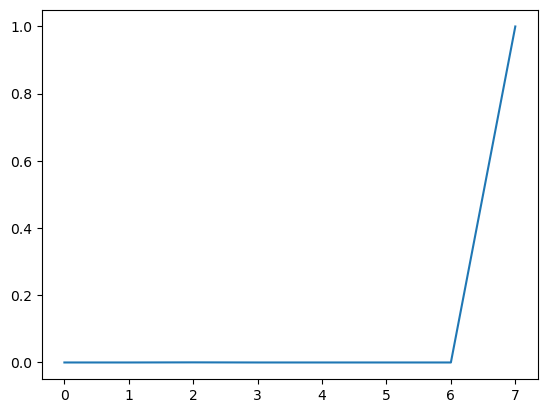

In [415]:
plt.plot(out[0])
plt.show()

To generate an adversarial example directly from audio, I need to have a differentiable STFT.

In [45]:
stft = tf.signal.stft(wave.ys, 
                      frame_length=1024, frame_step=512,
                      window_fn=tf.signal.hamming_window)
stft = stft[:, :int(stft.shape[1] * 5000 / (wave.ys.shape[0] // 2))]

In [46]:
stft.shape

TensorShape([30, 320])

In [47]:
np.abs(stft.numpy()).T[::-1].shape

(320, 30)

In [55]:
496 / 2 / 2 / 2 / 2 / 31

1.0

In [81]:
369 / 3 / 3 / 41

41.0

In [85]:
tf.repeat(ttt, 16, axis=1).shape

TensorShape([320, 480, 1])

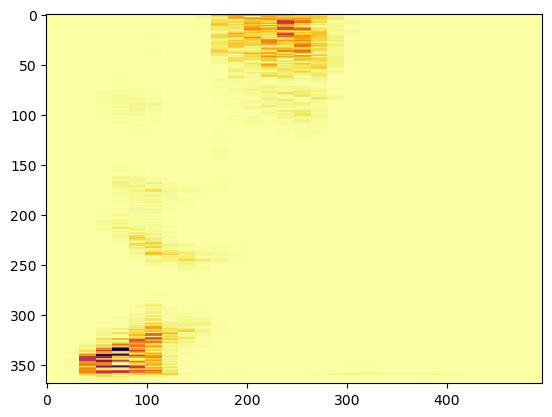

In [86]:
plt.imshow(img.numpy()[0], cmap='gray')
plt.show()

/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


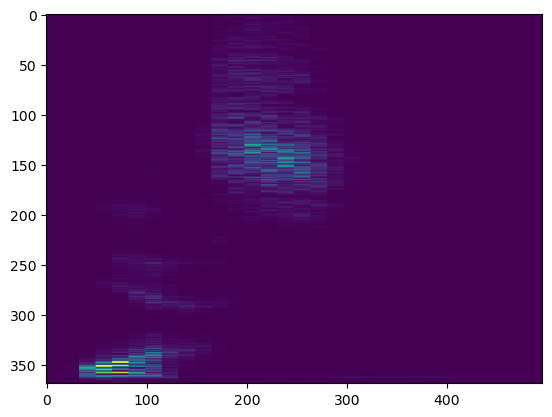

In [97]:
ttt = tf.math.abs(stft)#[:,:,None]
ttt = tf.transpose(ttt)[:,:,None][::-1]
ttt = tf.repeat(ttt, 16, axis=1)
ttt = tf.image.resize(ttt, (369, 496))
c_ttt = colorize(ttt, cmap='inferno_r')
plt.imshow(ttt)
plt.show()

In [92]:
import matplotlib

def colorize(value, vmin=None, vmax=None, cmap=None):
        """
        A utility function for TensorFlow that maps a grayscale image to a matplotlib
        colormap for use with TensorBoard image summaries.
        Arguments:
          - value: 2D Tensor of shape [height, width] or 3D Tensor of shape
            [height, width, 1].
          - vmin: the minimum value of the range used for normalization.
            (Default: value minimum)
          - vmax: the maximum value of the range used for normalization.
            (Default: value maximum)
          - cmap: a valid cmap named for use with matplotlib's `get_cmap`.
            (Default: 'gray')
        Example usage:
        ```
        output = tf.random_uniform(shape=[256, 256, 1])
        output_color = colorize(output, vmin=0.0, vmax=1.0, cmap='plasma')
        tf.summary.image('output', output_color)
        ```

        Returns a 3D tensor of shape [height, width, 3].
        """

        # normalize
        vmin = tf.reduce_min(value) if vmin is None else vmin
        vmax = tf.reduce_max(value) if vmax is None else vmax
        value = (value - vmin) / (vmax - vmin) # vmin..vmax

        # squeeze last dim if it exists
        value = tf.squeeze(value)

        # quantize
        indices = tf.cast(tf.round(value * 255), tf.int32)

        # gather
        cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')
        colors = tf.constant(cm.colors, dtype=tf.float32)
        value = tf.gather(colors, indices)

        return value

/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


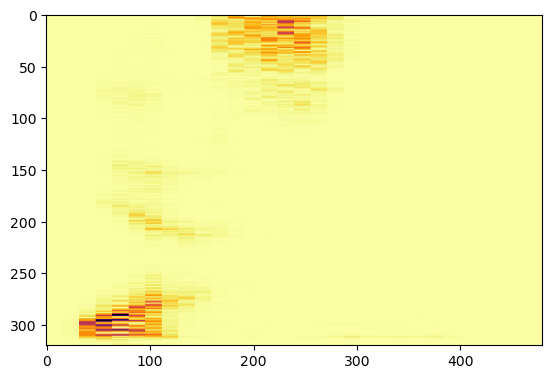

In [93]:
plt.imshow(colorize(ttt, cmap='inferno_r'))
plt.show()

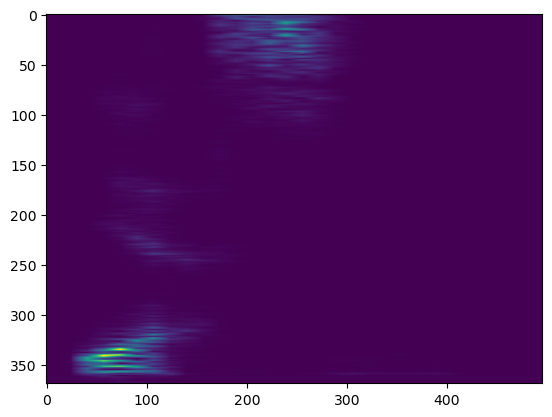

In [80]:
ttt = tf.math.abs(stft)#[:,:,None]
ttt = tf.transpose(ttt)[:,:,None][::-1]
plt.imshow(tf.image.resize(ttt, (369, 496)).numpy()[:,:,0])
plt.show()

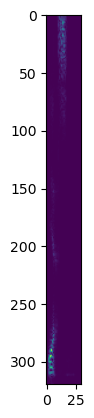

(369, 496)


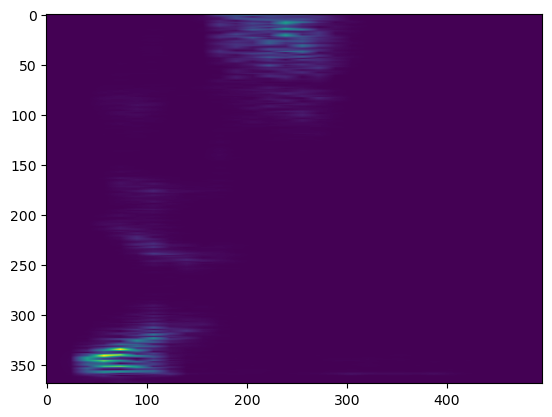

In [48]:
plt.imshow(np.abs(stft.numpy()).T[::-1])
plt.show()
im = cv2.resize(np.abs(stft.numpy()).T[::-1], (496, 369), 0, 0, cv2.INTER_NEAREST)
print(im.shape)
plt.imshow(im)
plt.show()

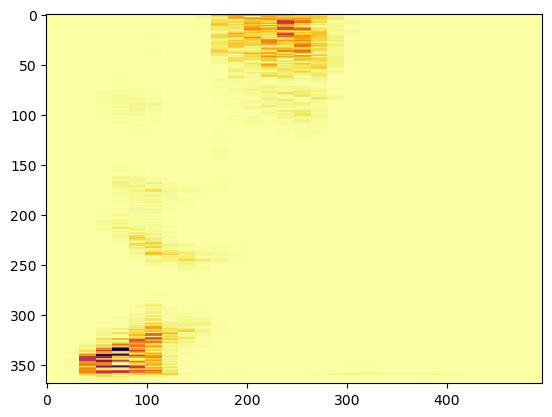

In [29]:
plt.imshow(img.numpy()[0], cmap='gray')
plt.show()

Visually two spectrograms (from thinkdsp and from tf) are indistiguishable. They have the same shape. The largest absolute error between corresponding values of each spectrogram is .147, which is okay for my purposes. Let's see later on performance.

Largest absolute error: 0.147
Shapes. TF: (513, 30); Thinkdsp: (513, 30)


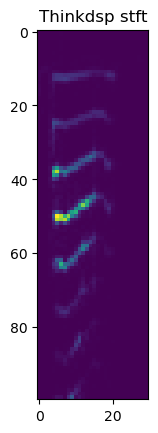

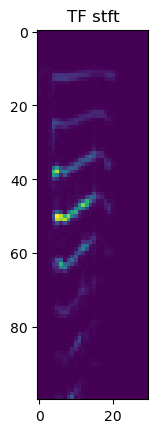

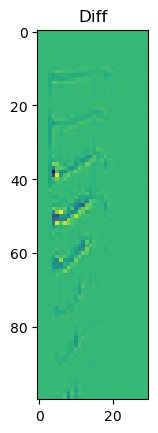

In [237]:
err = spectrogram.get_data() - np.abs(stft.numpy()).T
err = np.abs(err).max()
print("Largest absolute error: %.3f" % (err, ))
print(f"Shapes. TF: {np.abs(stft.numpy()).T.shape}; Thinkdsp: {spectrogram.get_data().shape}")
plt.imshow(spectrogram.get_data()[:100])
plt.title("Thinkdsp stft")
plt.show()
plt.imshow(np.abs(stft.numpy()).T[:100])
plt.title("TF stft")
plt.show()
plt.imshow(spectrogram.get_data()[:100] - np.abs(stft.numpy()).T[:100])
plt.title("Diff")
plt.show()

And I can inded take a gradient w.r.t. the input using tf's stft.

In [98]:
c_ttt.shape

TensorShape([369, 496, 3])

In [118]:
inp = tf.convert_to_tensor(wave.ys)
with tf.GradientTape() as tape:
    tape.watch(inp)
    stft = tf.signal.stft(inp, 
                          frame_length=1024, frame_step=512,
                          window_fn=tf.signal.hamming_window)
    stft = stft[:, :int(stft.shape[1] * 5000 / (wave.ys.shape[0] // 2))]
    ttt = tf.math.abs(stft)#[:,:,None]
    ttt = tf.transpose(ttt)[:,:,None][::-1]
    ttt = tf.repeat(ttt, 16, axis=1)
    ttt = tf.image.resize(ttt, (369, 496))
    tape.watch(ttt)
    c_ttt = colorize(ttt, cmap='inferno_r')[None]
#     plt.imshow(c_ttt.numpy()[0])
#     plt.show()
    tape.watch(c_ttt)
    
    probs = model(c_ttt)
    print(probs)
    loss = probs[0, 7]

grad = tape.gradient(loss, ttt)
grad

tf.Tensor(
[[1.6682291e-11 6.2910170e-11 7.3095196e-04 8.6705906e-11 1.5999079e-07
  6.1136979e-07 6.1952989e-07 9.9926776e-01]], shape=(1, 8), dtype=float32)


/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


In [119]:
grad

In [258]:

test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory='test_audio',
    batch_size=1,
    seed=0,
    output_sequence_length=16000)

Found 1599 files belonging to 8 classes.


In [7]:

def tf_stft(x, y):
    x = tf.squeeze(x, axis=-1)
    print(tf.reduce_min(x), tf.reduce_max(x))
#     stft = tf.signal.stft(x, 
#                    frame_length=1024, frame_step=512,
#                    window_fn=tf.signal.hamming_window)
#     stft = tf.math.abs(stft)
#     print(stft.shape)
#     stft = tf.transpose(stft, perm=[2,1,0])[::-1]
#     print(stft.shape)
#     stft = tf.image.resize(stft, (369, 496))
#     print(stft.shape)
#     stft = tf.transpose(stft, perm=[2,0,1])
#     stft = tf.expand_dims(stft, -1)
#     stft = tf.image.grayscale_to_rgb(stft)
#     print(stft.shape)
    print(1, x.shape)
    stft = tf.signal.stft(x, 
                          frame_length=1024, frame_step=512,
                          window_fn=tf.signal.hamming_window)
    stft = stft[:, :, :int(stft.shape[2] * 5000 / (x.shape[1] // 2))]
    print(2, stft.shape)
    stft = tf.math.abs(stft)#[:,:,None]
#     stft = tf.transpose(stft)#[:, ::-1]
    print(2.5, stft.shape)
    stft = tf.repeat(stft, 16, axis=1)
    print(3, stft.shape)
    stft = tf.transpose(stft, perm=[2,1,0])[::-1]
    stft = tf.image.resize(stft, (369, 496))
    stft = tf.transpose(stft, perm=[2,0,1])
    
#     tf.compat.v1.enable_eager_execution()
#     print(dir(stft))
#     n_stft = tf.make_ndarray(stft)#.numpy()
    # Normalize samples
#     print(stft.shape)
#     vmin = tf.broadcast_to(tf.reduce_min(stft, axis=(1,2)), stft.shape)
#     vmax = tf.broadcast_to(tf.reduce_max(stft, axis=(1,2)), [64, 369, 496])#stft.shape)
#     vmin = tf.reduce_min(stft)
#     vmax = tf.reduce_max(stft)
#     stft = (stft - vmin) / (vmax - vmin)
#     stft = tft.scale_by_min_max(stft)
    
    
#     print(4, stft.shape)
    stft = tf.expand_dims(stft, -1)
#     print(5, stft.shape)
    stft = tf.image.grayscale_to_rgb(stft)
    print(6, stft.shape)
    
#     print(6.5, vmin.shape)
#     stft = tf.keras.utils.normalize(stft, axis=(1,2,3))
    
#     stft = tf.math.add(stft, -vmin) / tf.math.add(vmax, -vmin)
#     print('loh')
    
    return stft, tf.one_hot(y, 8)


test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory='train_audio',
    batch_size=64,
    seed=0,
    output_sequence_length=16000)

test_ds = test_ds.map(tf_stft)#, tf.data.AUTOTUNE)

Found 6398 files belonging to 8 classes.
Tensor("Min:0", shape=(), dtype=float32) Tensor("Max:0", shape=(), dtype=float32)
1 (None, 16000)
2 (None, 30, 320)
2.5 (None, 30, 320)
3 (None, 480, 320)
6 (None, 369, 496, 3)


In [20]:
import keras.backend as K

pretrained_model = keras.models.load_model('my_model', compile=False)
# Load model but initialize new weights
distilled_model = tf.keras.models.clone_model(
    pretrained_model
)

distilled_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

print(distilled_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 367, 494, 8)       224       
                                                                 
 normalization (Normalizatio  (None, 367, 494, 8)      17        
 n)                                                              
                                                                 
 max_pooling2d (MaxPooling2D  (None, 183, 247, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 181, 245, 16)      1168      
                                                                 
 normalization_1 (Normalizat  (None, 181, 245, 16)     33        
 ion)                                                            
                                                        

In [21]:
tf.debugging.set_log_device_placement(True)
EPOCHS = 3
BATCH_SIZE = 64
history = model.fit(test_ds,
#                     steps_per_epoch=test_ds.samples // BATCH_SIZE // 2,
                    epochs=EPOCHS,
                    validation_data=test_ds,
#                     validation_steps= test_ds.samples // BATCH_SIZE // 2,
                    verbose=1
                    )

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 2.2205 - categorical_accuracy: 0.3462

KeyboardInterrupt: 

(1, 16000, 1)
(1,)
tf.Tensor(-0.31463623, shape=(), dtype=float32) tf.Tensor(0.39108276, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


2023-04-15 22:14:32.558676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1599]
	 [[{{node Placeholder/_4}}]]
2023-04-15 22:14:32.559247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1599]
	 [[{{node Placeholder/_0}}]]


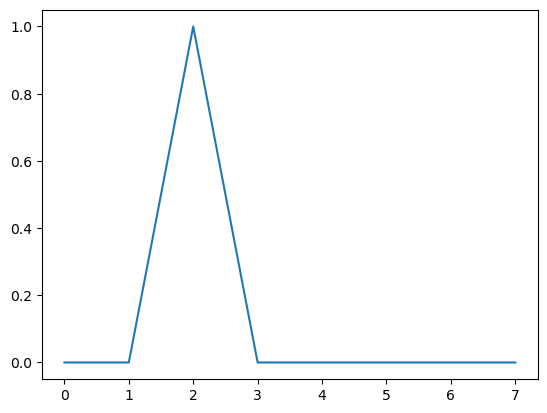

Class: 2
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


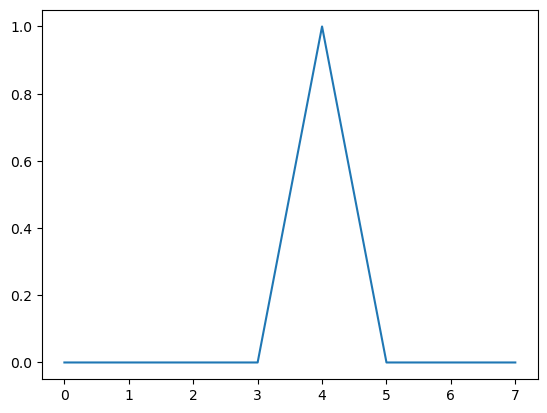

tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


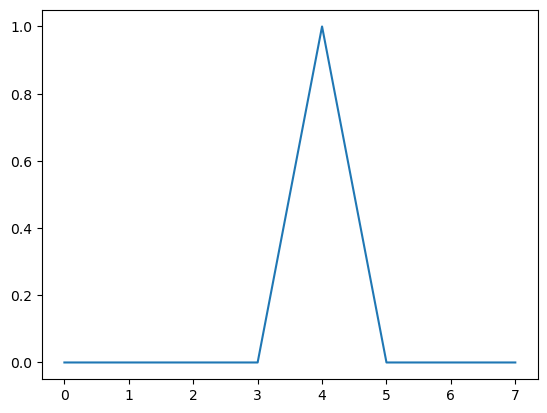

Class: 4
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


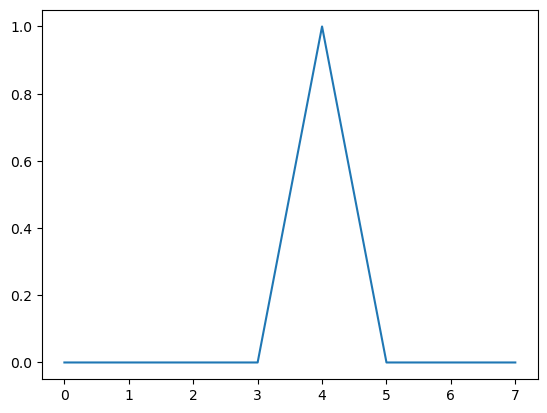

tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


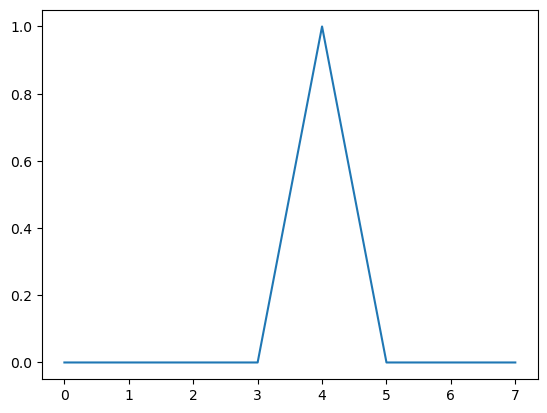

Class: 4
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


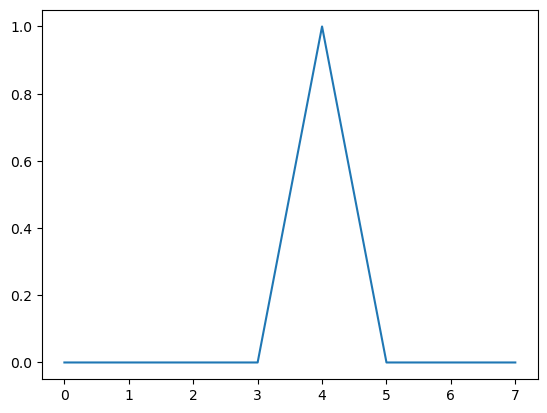

In [335]:
for example_audio, example_labels in test_ds.take(1):  
#     print(tf.reduce_min(example_audio).numpy(), tf.reduce_max(example_audio).numpy())
    print(example_audio.shape)
    print(example_labels.shape)
    
for i in range(3):
    with tf.GradientTape() as tape:
        tape.watch(example_audio)
        example_stft, example_labels_ = tf_stft(example_audio, example_labels)
        probs = model(example_stft)
        plt.plot(probs.numpy()[0])
        plt.show()
        cls = probs[0].numpy().argmax()
        print("Class:", cls)
        loss = probs[0, cls]

    grad = tape.gradient(loss, example_audio)
    example_audio -= tf.math.sign(grad)

    example_stft, example_labels_ = tf_stft(example_audio, example_labels)
    probs = model(example_stft)
    plt.plot(probs.numpy()[0])
    plt.show()

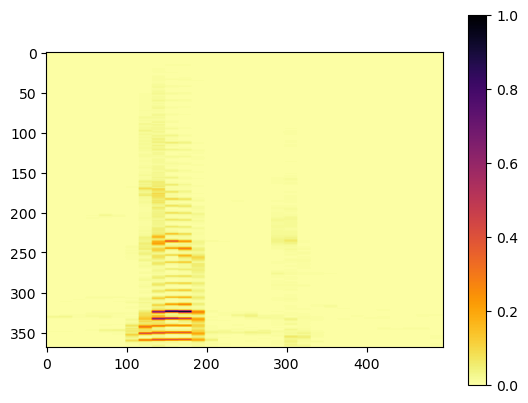

In [277]:
fig,axs = plt.subplots(1,1)
imshow = axs.imshow(example_audio[0].numpy()[:, :, 0], cmap='inferno_r')
cbar = plt.colorbar(imshow)
fig.show()

In [278]:
model = keras.models.load_model('my_model')

In [279]:
model.evaluate(test_ds)

2023-04-15 21:55:45.174369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1599]
	 [[{{node Placeholder/_0}}]]
2023-04-15 21:55:45.174663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1599]
	 [[{{node Placeholder/_4}}]]


1599/1599 [==============================] - 8s 5ms/step - loss: 16.3348 - accuracy: 0.1251


[16.33482551574707, 0.12507817149162292]